In [99]:
import os
import pandas as pd
from tqdm import tqdm
import shutil
from src import utils
from scipy.stats import spearmanr
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Project path
project_dir = os.path.abspath('')[:-9]
# Load enviromental variables

env_var = utils.load_env_variables(project_dir)
env_var["root_path"] = "/home/tpinho/IJGIS/Datasets/Brazil_Election_2018/"

In [101]:
dataset = "Original"
scv_method = "RegGBSCV_R_Kappa_3.0"
ml_method = "KNN"
fs_method = "CFS"
latlon = "LatLon"
metric = "MSE"

In [102]:
results = {"Folds": [], metric: [], "FS": [], "colors": []}
path = os.path.join(env_var["root_path"], dataset, "results")
metrics_cfs = pd.read_csv(os.path.join(path, scv_method, "evaluations", fs_method, ml_method, "metrics_with_mcpm.csv"))
metrics_latlon = pd.read_csv(os.path.join(path, scv_method, "evaluations", latlon, ml_method, "metrics_with_mcpm.csv"))
cv_metrics_lat_lon = pd.read_csv(os.path.join(path, "CrossValidation", "evaluations", latlon, ml_method, "metrics_with_mcpm.csv"))
trad_metrics_lat_lon = pd.read_csv(os.path.join(path, "TraditionalSCV", "evaluations", latlon, ml_method, "metrics_with_mcpm.csv"))
opt_metrics_lat_lon = pd.read_csv(os.path.join(path, "Optimistic", "evaluations", latlon, ml_method, "metrics_with_mcpm.csv"))
rbuffer_metrics_lat_lon = pd.read_csv(os.path.join(path, "RBuffer", "evaluations", latlon, ml_method, "metrics_with_mcpm.csv"))


metrics_cfs = metrics_cfs[metrics_cfs["FOLD"] != 53 ]
metrics_latlon = metrics_latlon[metrics_latlon["FOLD"] != 53 ]


results["Folds"] = results["Folds"] + metrics_cfs["FOLD"].values.tolist()
results[metric] = results[metric] + metrics_cfs[metric].values.tolist()
results["FS"] = results["FS"] + ["Census"]*len(metrics_cfs)
results["colors"] = results["colors"] + ["#05c793ff"]*len(metrics_cfs)

results["Folds"] = results["Folds"] + metrics_latlon["FOLD"].values.tolist()
results[metric] = results[metric] + metrics_latlon[metric].values.tolist()
results["FS"] = results["FS"] + ["Latitude and Longitude"]*len(metrics_latlon)
results["colors"] = results["colors"] + ["#219ebcff"]*len(metrics_latlon)


metric_results = pd.DataFrame(results)
metric_results

,Folds,MSE,FS,colors
0,11,291.013619,Census,#05c793ff
1,12,1003.367649,Census,#05c793ff
2,13,249.934213,Census,#05c793ff
3,14,455.140553,Census,#05c793ff
4,15,157.619642,Census,#05c793ff
5,16,834.537029,Census,#05c793ff
6,17,190.517707,Census,#05c793ff
7,21,511.042330,Census,#05c793ff
8,22,625.268781,Census,#05c793ff
9,23,522.843406,Census,#05c793ff


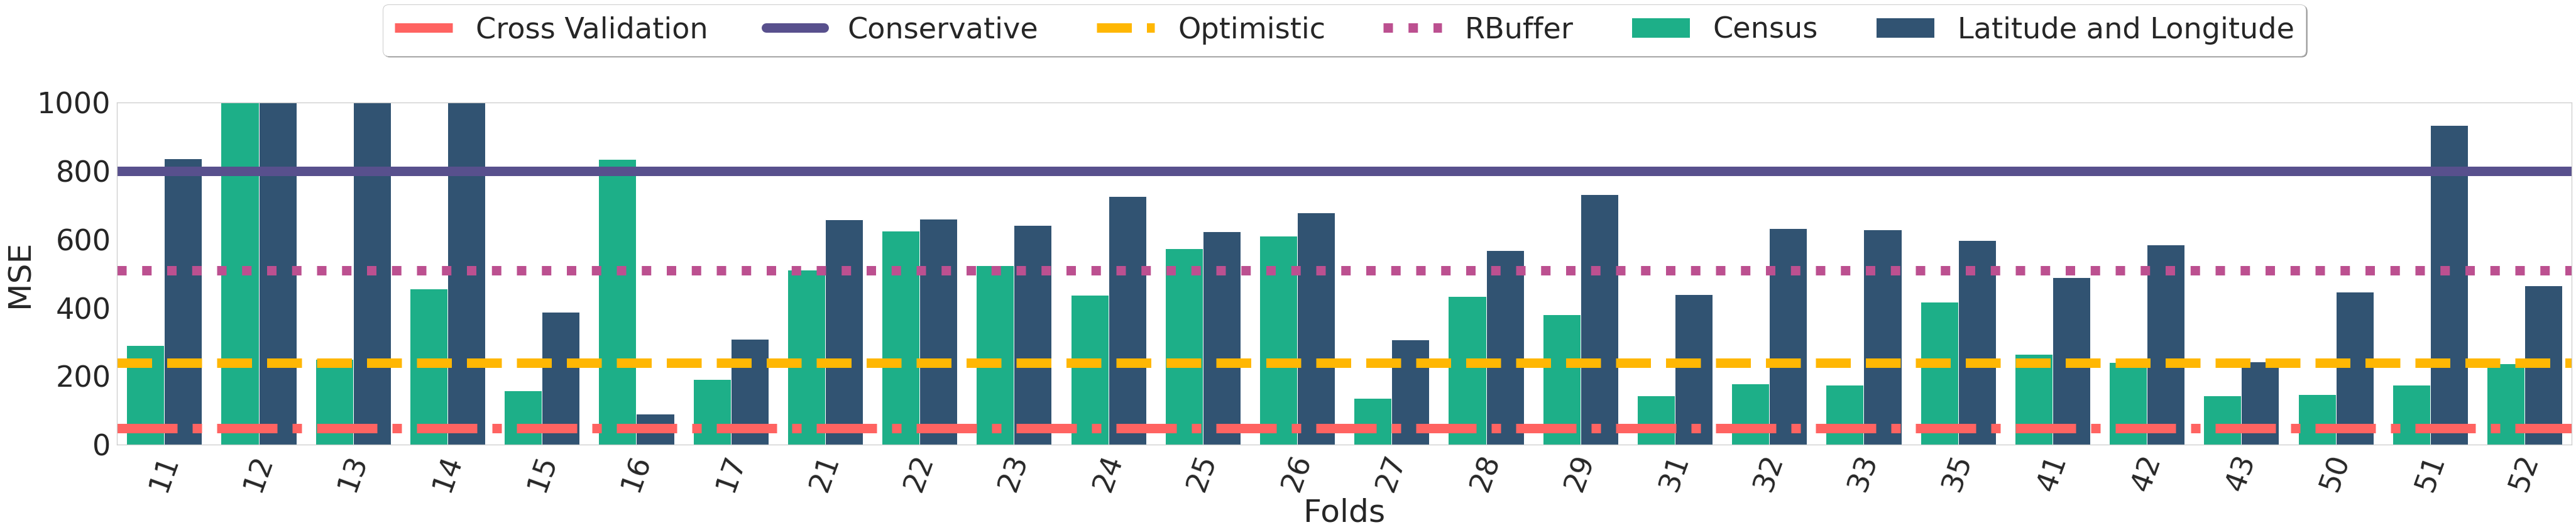

In [103]:
#reorgnize_col = ["RegGBSCV_R_Kappa_0.0", "Optimistic", "TraditionalSCV", "RBuffer", "CrossValidation"]
#metric_results = metric_results[reorgnize_col]
palette = [ "#05c793ff", "#26547dff"]
sns.set(font_scale=4.2)
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(70,10))
sns.barplot(data=metric_results,ax=ax, x="Folds", y=metric, hue="FS", palette=palette)
ax.set_title("")
ax.axhline(cv_metrics_lat_lon["MSE"].mean(), linewidth = 15, color="#ff6361ff", label="Cross Validation", ls='-.')
ax.axhline(trad_metrics_lat_lon["MSE"].mean(), linewidth = 15, color="#58508dff", label="Conservative", ls='-')
ax.axhline(opt_metrics_lat_lon["MSE"].mean(), linewidth = 15, color="#ffb703ff", label="Optimistic", ls='--')
ax.axhline(rbuffer_metrics_lat_lon["MSE"].mean(), linewidth = 15, color="#bc5090ff", label="RBuffer", ls=':')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.33),
          fancybox=True, shadow=True, ncol=6)

if metric == "MSE":
    ax.set(ylim=(0,1000))
if metric == "SP":
    ax.set(ylim=(0,1))

plt.xticks(rotation=70)

plt.savefig(os.path.join(env_var["root_path"], dataset, "latlon_vs_census",f"{ml_method}_{scv_method}_{metric}.png"), bbox_inches='tight')
